In [2]:
import pyforest

In [3]:
dir(pyforest)

['ARIMA',
 'CountVectorizer',
 'ElasticNet',
 'ElasticNetCV',
 'GradientBoostingClassifier',
 'GradientBoostingRegressor',
 'GridSearchCV',
 'Image',
 'KFold',
 'KMeans',
 'LabelEncoder',
 'Lasso',
 'LassoCV',
 'LazyImport',
 'LinearRegression',
 'LogisticRegression',
 'MinMaxScaler',
 'OneHotEncoder',
 'PCA',
 'Path',
 'PolynomialFeatures',
 'Prophet',
 'RandomForestClassifier',
 'RandomForestRegressor',
 'RandomizedSearchCV',
 'Ridge',
 'RidgeCV',
 'RobustScaler',
 'SimpleImputer',
 'SparkContext',
 'StandardScaler',
 'StratifiedKFold',
 'TSNE',
 'TfidfVectorizer',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_importable',
 '_imports',
 '_jupyter_labextension_paths',
 '_jupyter_nbextension_paths',
 'active_imports',
 'alt',
 'bokeh',
 'cross_val_score',
 'cv2',
 'dash',
 'dd',
 'disable_javascript_update',
 'dt',
 'fastai',
 'fbprophet',
 'gensim',
 'get_user_symbols',
 'glob',
 'go',


In [4]:
data = pd.read_csv(r'C:\Users\navup\OneDrive\Pictures\Screenshots\diabetes.csv')

<IPython.core.display.Javascript object>

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [35]:
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())

In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

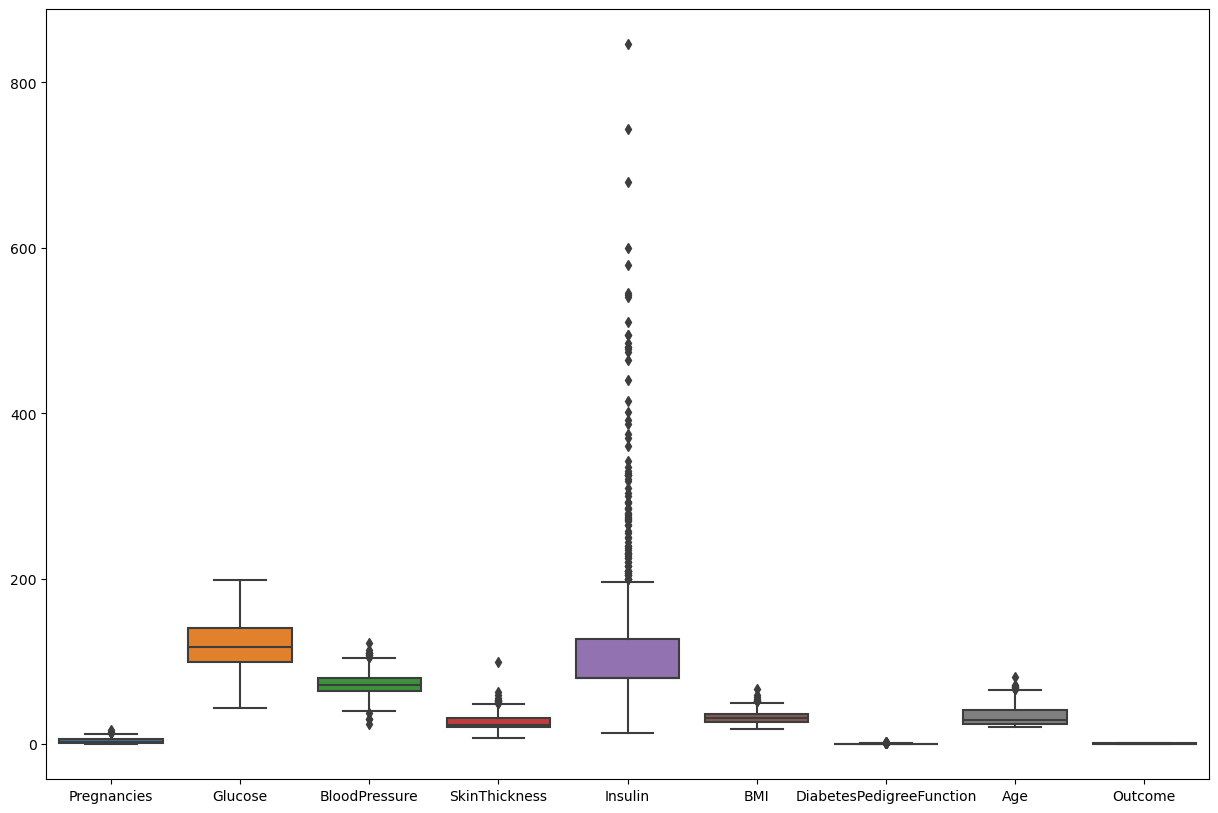

In [10]:
fig,ax = plt.subplots(figsize = (15,10))
sns.boxplot(data = data, ax = ax, fliersize = 5 )

In [11]:
x = data.drop(['Outcome'], axis =1)

In [12]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [13]:
y = data['Outcome']

In [14]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [15]:
scalar = StandardScaler()

<IPython.core.display.Javascript object>

In [16]:
X_scaled = scalar.fit_transform(x)

In [17]:
X_scaled

array([[ 0.63994726,  0.86527574, -0.0210444 , ...,  0.16725546,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20598931, -0.51658286, ..., -0.85153454,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01597855, -0.68176235, ..., -1.33182125,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02240928, -0.0210444 , ..., -0.90975111,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14197684, -1.01212132, ..., -0.34213954,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94297153, -0.18622389, ..., -0.29847711,
        -0.47378505, -0.87137393]])

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,y)

<IPython.core.display.Javascript object>

In [19]:
model = LogisticRegression()

<IPython.core.display.Javascript object>

In [20]:
model.fit(X_train,Y_train)

LogisticRegression()

In [21]:
predict = model.predict(X_test)

In [22]:
predict

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [23]:
actual = Y_test

In [24]:
actual

373    0
251    0
766    1
500    0
103    0
      ..
16     1
255    1
223    0
10     0
354    0
Name: Outcome, Length: 192, dtype: int64

In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [26]:
cm = confusion_matrix(actual,predict) 

In [27]:
tp = cm[1][1] #true positive
fp = cm[0][1] #false positive
fn = cm[1][0] #false negative
tn = cm[0][0] #true negative

In [28]:
accuracy = (tp+tn)/(tp+tn+fn+fp) #using the formula

In [29]:
accuracy

0.7760416666666666

In [30]:
accuracy_score(actual,predict) #using the method

0.7760416666666666

In [31]:
precision = tp/(tp+fp) #formula

In [32]:
precision

0.6530612244897959

In [33]:
precision_score(actual,predict) #method

0.6530612244897959

In [1]:
# The formula answer matches the method answer, giving us clarity about the formula used